#Student Name: Aidan Keeshan
#Student ID:   18200117

In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

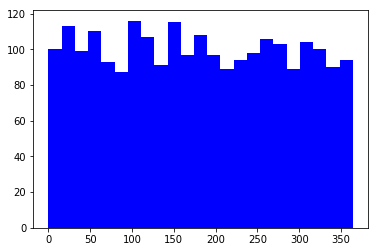

In [2]:
num_bins = 23
samples = np.random.randint(365, size=23*100)
plt.hist(samples, num_bins, facecolor='blue')
plt.show()

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

def run_simulation(num_interations,plt_color='blue'):
    num_samples = 23
    results = np.zeros((num_interations,4))
    cumulative_result = 0
    for row in range(len(results)):
        results[row][0] = row + 1
        birthdays = np.random.randint(365, size=num_samples)
        birthday_duplicate = 0 if np.max(np.bincount(birthdays)) > 1 else 1
        results[row][1] = birthday_duplicate
        cumulative_result += birthday_duplicate
        results[row][2] = cumulative_result
        results[row][3] = results[row][2]/results[row][0]
    print("The propality of random group of 23 people having same birthday after {} simulations is: {:.1%}".format(str(num_interations), results[num_interations-1][3]))
    plt.plot(results[:,0], results[:,3], color=plt_color)
    plt.show()

The propality of random group of 23 people having same birthday after 100 simulations is: 48.0%


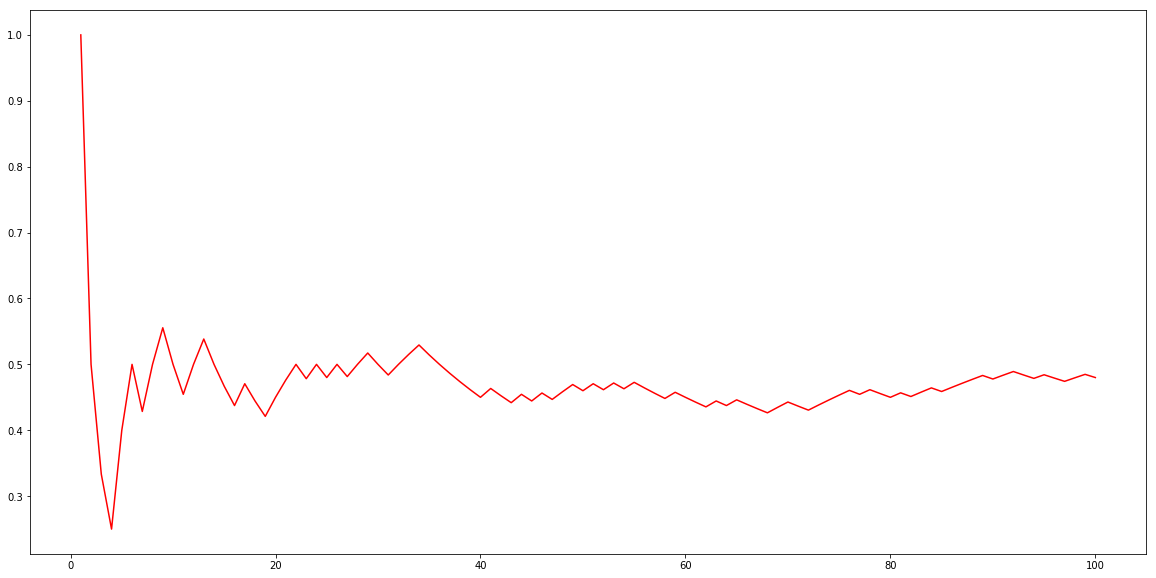

In [9]:
run_simulation(100,'red')

The propality of random group of 23 people having same birthday after 1000 simulations is: 49.9%


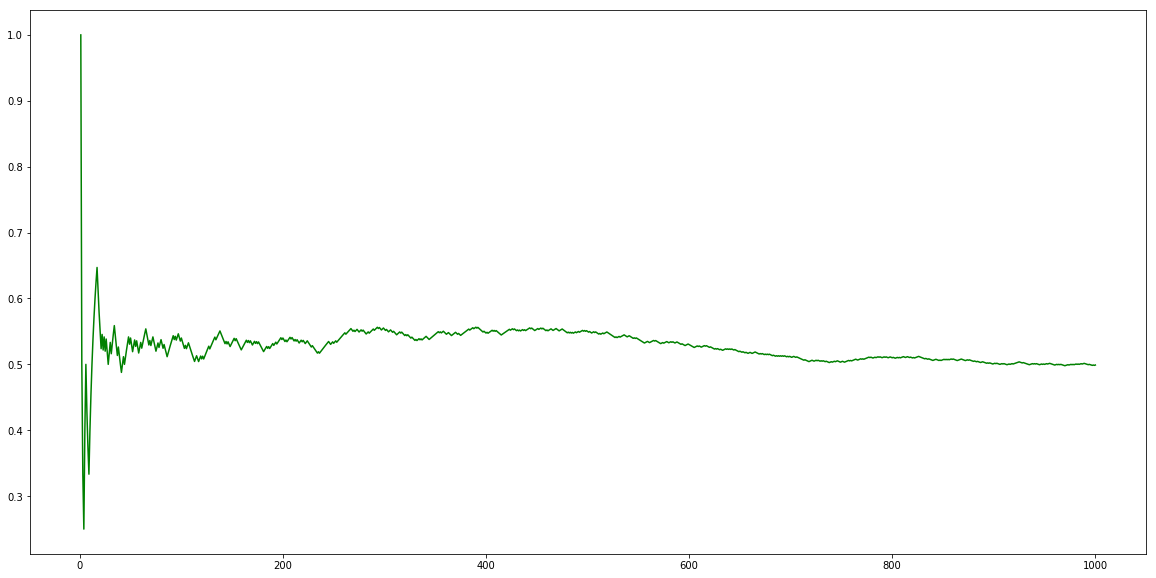

In [10]:
run_simulation(1000,'green')

The propality of random group of 23 people having same birthday after 10000 simulations is: 49.4%


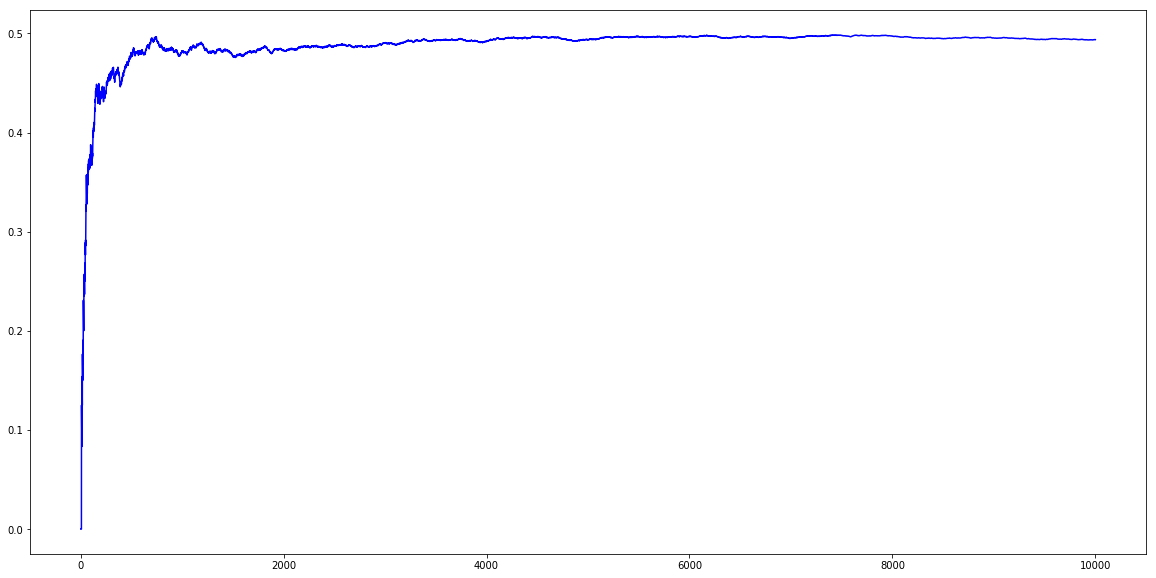

In [11]:
run_simulation(10000,'blue')